In [1]:
# nexflix_cerdits = pd.read_csv('/content/drive/MyDrive/aiffel/Dataton/DataTon/Nexflix/Nexflix_credits.csv')
# nexflix_title = pd.read_csv('/content/drive/MyDrive/aiffel/Dataton/DataTon/Nexflix/Nexflix_titles.csv')

In [2]:
# disney_cerdits = pd.read_csv('/content/drive/MyDrive/aiffel/Dataton/DataTon/Disney/Disney_credits.csv')
# disney_title = pd.read_csv('/content/drive/MyDrive/aiffel/Dataton/DataTon/Disney/Disney_titles.csv')

In [3]:
# amazon_cerdits = pd.read_csv('/content/drive/MyDrive/aiffel/Dataton/DataTon/Amazon/Amazon_credits.csv')
# amazon_title = pd.read_csv('/content/drive/MyDrive/aiffel/Dataton/DataTon/Amazon/Amazon_titles.csv')

In [4]:
# paramount_cerdits = pd.read_csv('/content/drive/MyDrive/aiffel/Dataton/DataTon/Paramount/Paramount_credits.csv')
# paramount_title = pd.read_csv('/content/drive/MyDrive/aiffel/Dataton/DataTon/Paramount/Paramount_titles.csv')

In [5]:
# nexflix_cerdits['OTT'] = 'Nexflix'
# disney_cerdits['OTT'] = 'Disney'
# paramount_cerdits['OTT'] = 'Paramount'
# amazon_cerdits['OTT'] = 'Amazon'


In [6]:
# nexflix_title['OTT'] = 'Nexflix'
# disney_title['OTT'] = 'Disney'
# paramount_title['OTT'] = 'Paramount'
# amazon_title['OTT'] = 'Amazon'


In [7]:
# print(nexflix_cerdits.shape)
# print('-'*50)
# print(disney_cerdits.shape)
# print('-'*50)
# print(paramount_cerdits.shape)
# print('-'*50)
# print(amazon_cerdits.shape)

In [8]:
# ott_credits = pd.concat([nexflix_cerdits,disney_cerdits,paramount_cerdits,amazon_cerdits])
# ott_credits


In [9]:
# nexflix_title.rename(columns={'id':'title_id'},inplace = True)
# paramount_title.rename(columns={'id':'title_id'},inplace = True)
# disney_title.rename(columns={'id':'title_id'},inplace = True)
# amazon_title.rename(columns={'id':'title_id'},inplace = True)

In [10]:
# print(nexflix_title.shape)
# print('-'*50)
# print(disney_title.shape)
# print('-'*50)
# print(paramount_title.shape)
# print('-'*50)
# print(amazon_title.shape)

In [11]:
# ott_title = pd.concat([nexflix_title,disney_title,paramount_title,amazon_title])
# ott_title


In [12]:
# ott_credits.to_csv('/content/drive/MyDrive/aiffel/Dataton/DataTon/Nexflix/ott_credits.csv',index=False)
# ott_title.to_csv('/content/drive/MyDrive/aiffel/Dataton/DataTon/Nexflix/ott_title.csv',index=False)

-------

### 1. titles.csv(영상 정보)

- title_ID: 서비스의 타이틀 ID
- title: 제목
- show type: 영상 분류(TV 쇼 or 영화)
- description: 영상의 간략한 설명
- release date: 출시 년도
- age certification: 연령 인증
- runtime: 에피소드(SHOW) 또는 영화의 길이
- genres: 장르 목록
- production countries: 타이틀을 제작한 국가 목록
- Seasons: SHOW인 경우 시즌 수
- IMDB ID: IMDB의 타이틀 ID
- IMDB score: IMDB 점수
- IMDB Votes: IMDB에 대한 투표
- TMDB Popularity: TMDB의 인기도
- TMDB Score: TMDB 점수
- OTT : 기업별 데이터 구분을 위한 구분자

-------
### 2. credits.csv(영상 타이틀별 감독, 배우 등 연출/출연진 정보)

- person ID: 서비스의 개인 ID
- ID: 서비스의 타이틀 ID
- name: 배우 또는 감독 이름
- charecter name : 캐릭터명
- role: ACTOR 또는 DIRECTOR
- OTT : 기업별 데이터 구분을 위한 구분자

-------------
# 전처리 시작

시청등급 / 장르 / 런타임

In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [14]:
ott_credits = pd.read_csv('https://raw.githubusercontent.com/saerannn/OTT-Platforms-Analytics/main/src/data/ott_credits.csv?token=GHSAT0AAAAAABTRWD4Y7PRWCR54GDUEK6ZKYUVQGSQ')
ott_credits.head()

,person_id,id,name,character,role,OTT
0,3748,tm84618,Robert De Niro,Travis Bickle,ACTOR,Nexflix
1,14658,tm84618,Jodie Foster,Iris Steensma,ACTOR,Nexflix
2,7064,tm84618,Albert Brooks,Tom,ACTOR,Nexflix
3,3739,tm84618,Harvey Keitel,Matthew 'Sport' Higgins,ACTOR,Nexflix
4,48933,tm84618,Cybill Shepherd,Betsy,ACTOR,Nexflix


In [15]:
ott_title = pd.read_csv('https://raw.githubusercontent.com/saerannn/OTT-Platforms-Analytics/main/src/data/ott_title.csv?token=GHSAT0AAAAAABTRWD4ZVTFCF26AMWUSZGHOYUVQHKA')
ott_title.head()

,title_id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,OTT
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN,Nexflix
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],1.0,tt0075314,8.3,795222.0,27.612,8.2,Nexflix
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],1.0,tt0071853,8.2,530877.0,18.216,7.8,Nexflix
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],1.0,tt0079470,8.0,392419.0,17.505,7.8,Nexflix
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],1.0,tt0070047,8.1,391942.0,95.337,7.7,Nexflix


'TV-PG': 어린이가 시청하려면 보호자 지도가 권장되는 프로그램

'TV-MA': 17세 미만의 어린이 혹은 청소년한테 부적절한 프로그램'

'TV-Y7-FV': 7세 이상의 어린이를 위한 프로그램으로 매우 경미한 가상의 폭력 묘사가 있음

'TV-Y7': 7세 이상의 어린이를 위한 프로그램

'TV-14': 14세 미만의 어린이 혹은 청소년이 시청하려면 보호자 지도가 권장되는 프로그램

'R': 15세 관람가

'TV-Y': 영유아를 위한 프로그램

'NR': 청소년 관람불가

'PG-13': 12세 관람가에서 15세 관람가

'TV-G': 모든 연령이 시청할 수 있는 프로그램. 다만 어린이를 대상으로 하지는 않았다

'PG': 12세 관람가

'G': 전체관람가

'UR': 청소년 관람불가 등급

'NC-17': 청소년 관람불가 등급

In [16]:
df = ott_title.copy()

In [17]:
a = df.groupby('OTT')['age_certification'].value_counts().reset_index(name='count')
a = a.replace('uknown',np.NaN)
a = a.dropna()
a

,OTT,age_certification,count
1,Amazon,R,1249
2,Amazon,PG-13,588
3,Amazon,PG,582
4,Amazon,G,269
5,Amazon,TV-MA,217
6,Amazon,TV-14,188
7,Amazon,TV-PG,91
8,Amazon,TV-Y,78
9,Amazon,TV-G,57
10,Amazon,TV-Y7,52


In [18]:
import plotly.express as px 
fig = px.bar(a, x='OTT', y='count', color='age_certification', text = 'count')
fig.show()

해당 값들은 각 국가별로 연령별 지정 값이 다르기 때문에 
ott사별 장르분포가 다양하게 나눠져있다.

장르별 기준치를 전체를 통일할 필요성이 있어보임

-------
- 0 ~ 7세 수준을 kids
- 7 ~ 14세 수준을 children
- 14 ~ 17세 수준을 teenager
- 그 이상을 adult로 치환

In [19]:
ratings_ages = {
    'TV-PG': 'chlidren',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'chlidren',
    'TV-Y7': 'chlidren',
    'TV-14': 'Teenager',
    'R': 'Teenager',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'chlidren',
    'TV-G': 'chlidren',
    'PG': 'chlidren',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

ott_title['target_ages'] = ott_title['age_certification'].replace(ratings_ages)
ott_title['target_ages'].unique()

array(['Adults', 'Teenager', 'chlidren', 'Kids', 'uknown'], dtype=object)

In [20]:
df = ott_title.copy()

In [21]:
a = df.groupby('OTT')['target_ages'].value_counts().reset_index(name='count')
a = a.replace('uknown',np.NaN)
a = a.dropna()
a

,OTT,target_ages,count
1,Amazon,Teenager,1437
2,Amazon,chlidren,1370
3,Amazon,Kids,347
4,Amazon,Adults,230
5,Disney,chlidren,702
6,Disney,Kids,453
8,Disney,Teenager,49
9,Disney,Adults,6
11,Nexflix,chlidren,1060
12,Nexflix,Teenager,1045


In [22]:
import plotly.express as px 
import plotly.graph_objects as go
fig = px.bar(a, x='OTT', y='count', color='target_ages', text = 'count')

fig.show()

- 4가지 기업 모두 children(7~14) 수준의 장르가 많이 분포 되어있다.

- amazon의 경우 의외로 adult(성인)을 위한 장르가 상대적으로 적으며, 성인 이하를 위한 콘텐츠 들이 다수 분포하는 것을 알 수 있음

- Disney의 경우 데이터셋의 수가 적고, 의외로 teenager(14~17) 수준의 장르의 분포가 적음을 알 수 있다. 또한 adults를 위한 장르가 시각적으로 보이지 않을 만큼 적은 수를 가지고 있다. (실제 수치는 6개)

- Nexflix는 전체적으로 고르게 분포가 되어 있으며, 4가지 기업 중 adults를 위한 장르가 가장 많다. 

- paramount는 17세 이하 즉, 미성년자를 위한 장르가 많으며 adults를 위한 장르는 다소 작다.

-----
# 연령별 장르(rating_age)에 따른 ott사별 점수 평가 비교(imdb기준)

In [23]:
df = ott_title.copy()

In [24]:
a2 = df.groupby(['OTT','target_ages'])['imdb_score'].mean().reset_index(name='mean')
a2 = a2.replace('uknown',np.NaN)
a2 = a2.dropna()
a2

,OTT,target_ages,mean
0,Amazon,Adults,7.260090
1,Amazon,Kids,6.077287
2,Amazon,Teenager,5.846402
3,Amazon,chlidren,6.126615
5,Disney,Adults,7.683333
6,Disney,Kids,6.401303
7,Disney,Teenager,7.214894
8,Disney,chlidren,6.654112
10,Nexflix,Adults,7.055155
11,Nexflix,Kids,6.466332


In [25]:
a3 = df.groupby(['OTT','target_ages'])['tmdb_score'].mean().reset_index(name='mean')
a3 = a3.replace('uknown',np.NaN)
a3 = a3.dropna()
a3

,OTT,target_ages,mean
0,Amazon,Adults,7.218468
1,Amazon,Kids,6.220539
2,Amazon,Teenager,5.924073
3,Amazon,chlidren,6.190218
5,Disney,Adults,7.450000
6,Disney,Kids,6.698214
7,Disney,Teenager,8.200000
8,Disney,chlidren,7.004401
10,Nexflix,Adults,7.360749
11,Nexflix,Kids,7.175362


In [26]:
fig = px.bar(a2, x='OTT', y='mean', color = 'target_ages', title = 'mean_IMDB_score by target_ages',text = 'mean')
fig.show()

- amazon = adult(7.2) > chlidren(6.1) > kids(6.0) > teenager(5.8)

- disney = adult(7.68) > teenager(7.2) > chlidren(6.6) > kids(6.4)

- nexflix = adult(7.0) > teenager(6.7) > chlidren(6.5) > kids(6.4)

- paramount = adult(6.7) > chlidren(6.4) > teenager(5.97) > kids(5.94)

In [27]:
fig = px.bar(a3, x='OTT', y='mean', color = 'target_ages',title = 'mean_TMDB_score by target_ages', text = 'mean')
fig.show()

amazon = adult(7.2) > kids(6.2) > children(6.1) > teenager(5.9)

disney = teenager(8.2) > adult(7.45)>  chlidren(7.0) > kids(6.7)

nexflix = adult(7.3) > kids(7.1) > teenager(6.95) > chlidren(6.9)

paramount = adult(7.0) > chlidren(6.5) > kids(6.4) > teenager(6.2)

--------
# 회사별 장르 개수

In [28]:
table = str.maketrans("[]'", '   ')
genres_list = "".join(np.array(ott_title['genres'].str.translate(table)).flatten().tolist())

genres_list = genres_list.replace(',',' ')

import re
genres_list = re.sub(r'[" "]+', " ", genres_list)
genres_list = genres_list.split()
genres_list = set(genres_list)
genres_list = list(genres_list)
genres_list

['comedy',
 'thriller',
 'scifi',
 'crime',
 'family',
 'european',
 'romance',
 'sport',
 'western',
 'horror',
 'war',
 'history',
 'action',
 'documentation',
 'reality',
 'music',
 'fantasy',
 'animation',
 'drama']

In [29]:
for genres in genres_list:
  ott_title[f'{genres}'] = ott_title['genres'].str.contains(genres)

In [30]:
ott_title = ott_title.replace(True,int(1))
ott_title = ott_title.replace(False, int(0))
ott_title.head()

,title_id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,horror,war,history,action,documentation,reality,music,fantasy,animation,drama
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,...,0,0,0,0,1,0,0,0,0,0
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],1.0,...,0,0,0,0,0,0,0,0,0,1
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],1.0,...,0,0,0,0,0,0,0,1,0,0
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],1.0,...,0,0,0,0,0,0,0,0,0,0
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],1.0,...,1,0,0,0,0,0,0,0,0,0


In [31]:
df = ott_title.groupby('OTT').sum()
df

,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,comedy,thriller,scifi,...,horror,war,history,action,documentation,reality,music,fantasy,animation,drama
OTT,,,,,,,,,,,,,,,,,,,,,
Amazon,19755101,848640,12302.0,52891.1,75437150.0,64430.745997,46611.3,2987,2119,705,...,1065,324,396,1820,1096,138,438,554,475,4764
Disney,3075492,92351,2192.0,7318.5,84366796.0,61323.453000,9862.7,649,57,265,...,29,6,41,304,351,62,98,392,486,347
Nexflix,11702959,450790,8191.0,34516.2,123285696.0,128666.568354,37417.4,2269,1178,587,...,380,149,233,1053,910,223,238,631,665,2901
Paramount,5623728,204120,4691.0,15790.0,58109868.0,36105.344442,14128.4,1007,511,244,...,259,113,126,533,495,109,146,181,176,1072


In [32]:
df = df.iloc[:,7:]
df['total'] = df.sum(axis=1)
df = df.reset_index()
df

,OTT,comedy,thriller,scifi,crime,family,european,romance,sport,western,...,war,history,action,documentation,reality,music,fantasy,animation,drama,total
0,Amazon,2987,2119,705,1251,751,712,1752,228,490,...,324,396,1820,1096,138,438,554,475,4764,22065
1,Disney,649,57,265,47,754,35,138,63,23,...,6,41,304,351,62,98,392,486,347,4147
2,Nexflix,2269,1178,587,891,622,460,958,166,44,...,149,233,1053,910,223,238,631,665,2901,14558
3,Paramount,1007,511,244,359,286,101,490,51,231,...,113,126,533,495,109,146,181,176,1072,6490


In [33]:
amazon_df = df.iloc[:1]
disney_df = df.iloc[1:2]
nexflix_df = df.iloc[2:3]
paramount_df = df.iloc[3:]

In [34]:
label = genres_list

In [35]:
amazon_ratio = amazon_df.iloc[:,1:-1].values
disney_ratio = disney_df.iloc[:,1:-1].values
nexflix_ratio = nexflix_df.iloc[:,1:-1].values
paramount_ratio = paramount_df.iloc[:,1:-1].values


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



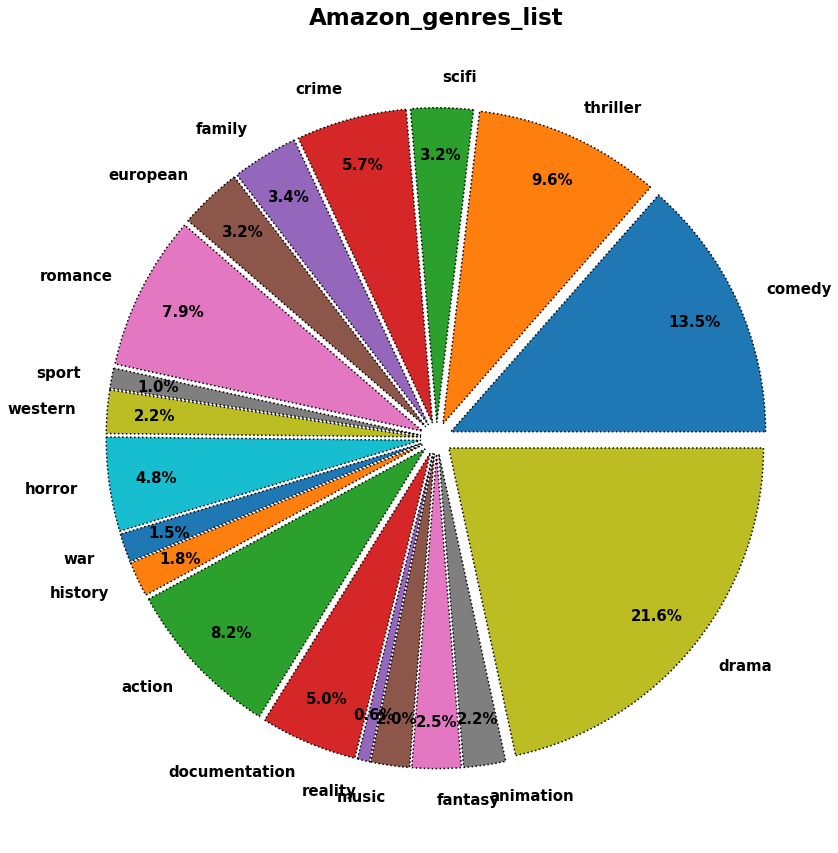

In [36]:
plt.figure(figsize = (13,15))
wedgeprops= {'edgecolor':'black','linewidth' : 1.5,'linestyle': ':'}
textprops = {'size' : 15, 'weight' : 'bold'}
title_font = {'fontsize': 23,'fontweight': 'bold'}
explode = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]

plt.pie(amazon_ratio, labels = label , autopct = '%.1f%%', pctdistance=0.85,explode=explode, textprops = textprops ,wedgeprops=wedgeprops)
plt.axis('equal')
plt.title('Amazon_genres_list', fontdict=title_font)
plt.show()

아마존의 경우 드라마와 코미디 장르가 주를 이루고 있으며,  
그 이후 스릴러 > 액션 > 로맨스 순으로 장르가 분포해 있다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



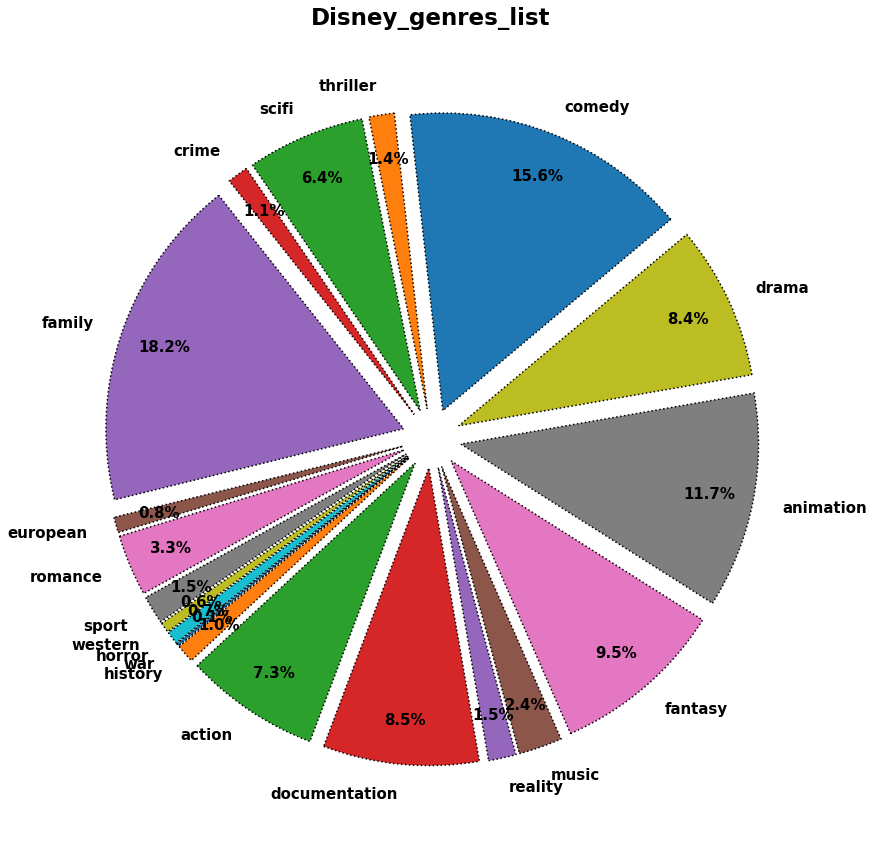

In [37]:
plt.figure(figsize = (13,15))
wedgeprops= {'edgecolor':'black','linewidth' : 1.5,'linestyle': ':'}
textprops = {'size' : 15, 'weight' : 'bold'}
title_font = {'fontsize': 23,'fontweight': 'bold'}
explode = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

plt.pie(disney_ratio, labels = label , autopct = '%.1f%%', pctdistance=0.85,explode=explode, textprops = textprops ,wedgeprops=wedgeprops,startangle=40)
plt.axis('equal')
plt.title('Disney_genres_list', fontdict=title_font)
plt.show()

디즈니는 가족 > 코미디 > 애니메이션 순으로 장르가 분포되어 있으며  
디즈니의 특성 답게 범죄,스릴러 물은 확연히 적은 것을 볼 수 있다.   
디즈니의 경우 의외로 타 회사와는 다르게 로맨스물의 비중이 적다.

디즈니의 경우 다큐를 기준으로 했을 떄 4가지 회사들 중 가장 많은 비중을 차지한다.  
공상과학(scifi)를 기준으로 했을 때 4가지 회사들 중 가장 많은 비중을 차지한다.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



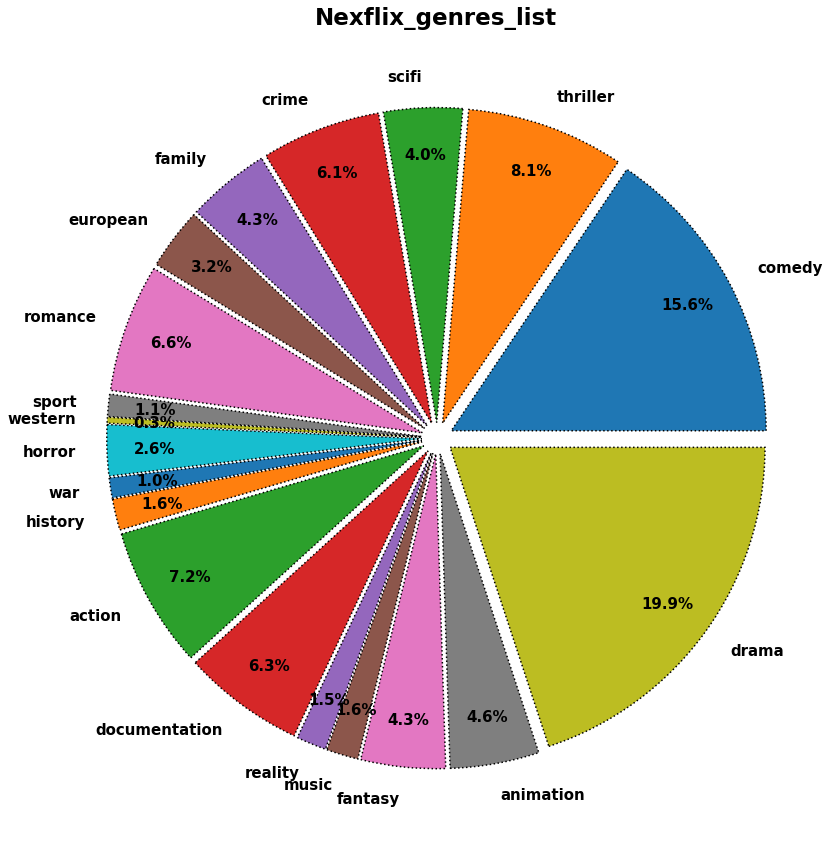

In [38]:
plt.figure(figsize = (13,15))
wedgeprops= {'edgecolor':'black','linewidth' : 1.5,'linestyle': ':'}
textprops = {'size' : 15, 'weight' : 'bold'}
title_font = {'fontsize': 23,'fontweight': 'bold'}
explode = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]

plt.pie(nexflix_ratio, labels = label , autopct = '%.1f%%', pctdistance=0.85,explode=explode, textprops = textprops ,wedgeprops=wedgeprops)
plt.axis('equal')
plt.title('Nexflix_genres_list', fontdict=title_font)
plt.show()

넷플릭스는 드라마 > 코미디 장르가 가장 많은 부분을 차지하고 있으며  
서부장르를 제외한 대부분의 장르들이 고르게 분포되어 있다.  


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning:

Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.



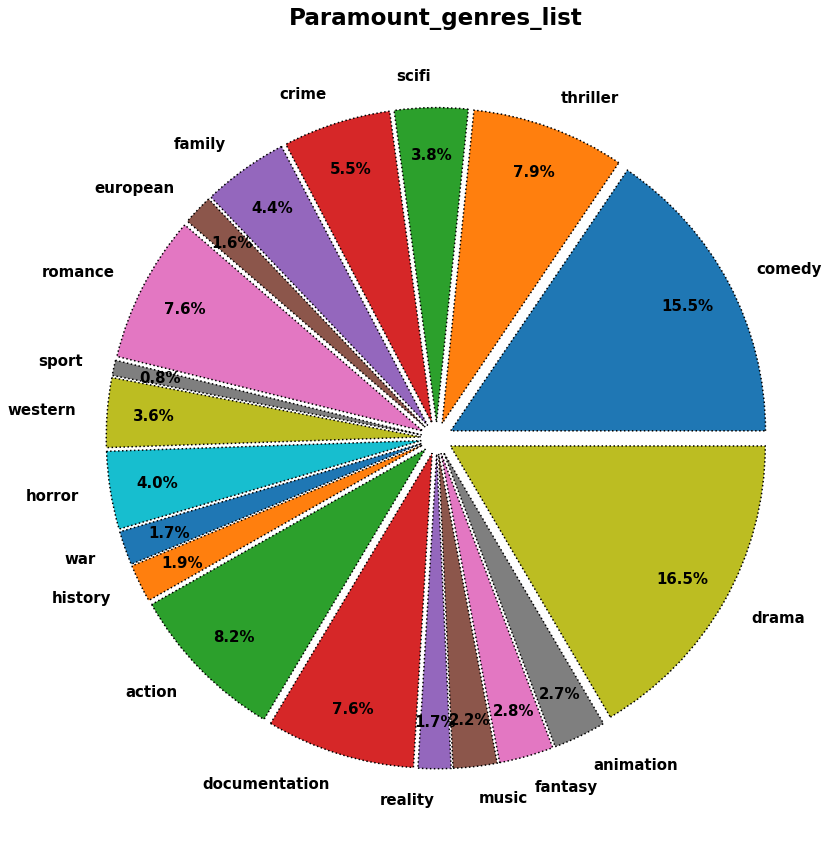

In [39]:
plt.figure(figsize = (13,15))
wedgeprops= {'edgecolor':'black','linewidth' : 1.5,'linestyle': ':'}
textprops = {'size' : 15, 'weight' : 'bold'}
title_font = {'fontsize': 23,'fontweight': 'bold'}
explode = [0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05,0.05]

plt.pie(paramount_ratio, labels = label , autopct = '%.1f%%', pctdistance=0.85,explode=explode, textprops = textprops ,wedgeprops=wedgeprops)
plt.axis('equal')
plt.title('Paramount_genres_list', fontdict=title_font)
plt.show()

파라마운트도 드라마 > 코미디 장르가 가장 많은 분포를 가지고 있으며  
파라마운트의 경우 4 회사들중 스포츠에 대한 비중이 가장 작다.


-------
# 장르별 평균 평점

In [40]:
score = ott_title.copy()

In [41]:
for i in range(len(score)):
  score.iloc[i] = score.iloc[i].replace(1,score['imdb_score'].iloc[i])

In [42]:
score = score.replace(0,np.NaN)

In [43]:
df = score.groupby('OTT').mean()
df = df.reset_index()
df

,OTT,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,comedy,thriller,...,horror,war,history,action,documentation,reality,music,fantasy,animation,drama
0,Amazon,2001.327221,86.027501,5.816032,5.976395,8533.614253,6.911556,6.018342,5.994900,5.538507,...,4.768531,6.396203,6.814248,5.671824,6.994837,6.745736,6.202532,5.937009,6.507143,6.132034
1,Disney,2003.577850,60.286358,5.985381,6.605144,76350.041629,40.238486,6.919004,6.310088,7.018182,...,6.552000,6.150000,7.026316,6.623368,7.110744,7.151852,6.295652,6.617367,6.727692,6.625538
2,Nexflix,2016.013609,77.977859,5.990335,6.533447,23407.194988,22.526483,6.828126,6.424303,6.359471,...,6.007438,7.088276,7.149785,6.457380,7.042822,6.425000,6.631390,6.582982,6.728803,6.656617
3,Paramount,1990.700177,72.282755,5.896571,6.042863,22238.755454,13.043838,6.068122,6.045399,5.621230,...,5.038039,6.352778,6.809091,5.785606,7.130052,6.063462,6.088811,5.803867,6.267702,6.018515


In [44]:
a = df
a

,OTT,release_year,runtime,seasons,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,comedy,thriller,...,horror,war,history,action,documentation,reality,music,fantasy,animation,drama
0,Amazon,2001.327221,86.027501,5.816032,5.976395,8533.614253,6.911556,6.018342,5.994900,5.538507,...,4.768531,6.396203,6.814248,5.671824,6.994837,6.745736,6.202532,5.937009,6.507143,6.132034
1,Disney,2003.577850,60.286358,5.985381,6.605144,76350.041629,40.238486,6.919004,6.310088,7.018182,...,6.552000,6.150000,7.026316,6.623368,7.110744,7.151852,6.295652,6.617367,6.727692,6.625538
2,Nexflix,2016.013609,77.977859,5.990335,6.533447,23407.194988,22.526483,6.828126,6.424303,6.359471,...,6.007438,7.088276,7.149785,6.457380,7.042822,6.425000,6.631390,6.582982,6.728803,6.656617
3,Paramount,1990.700177,72.282755,5.896571,6.042863,22238.755454,13.043838,6.068122,6.045399,5.621230,...,5.038039,6.352778,6.809091,5.785606,7.130052,6.063462,6.088811,5.803867,6.267702,6.018515


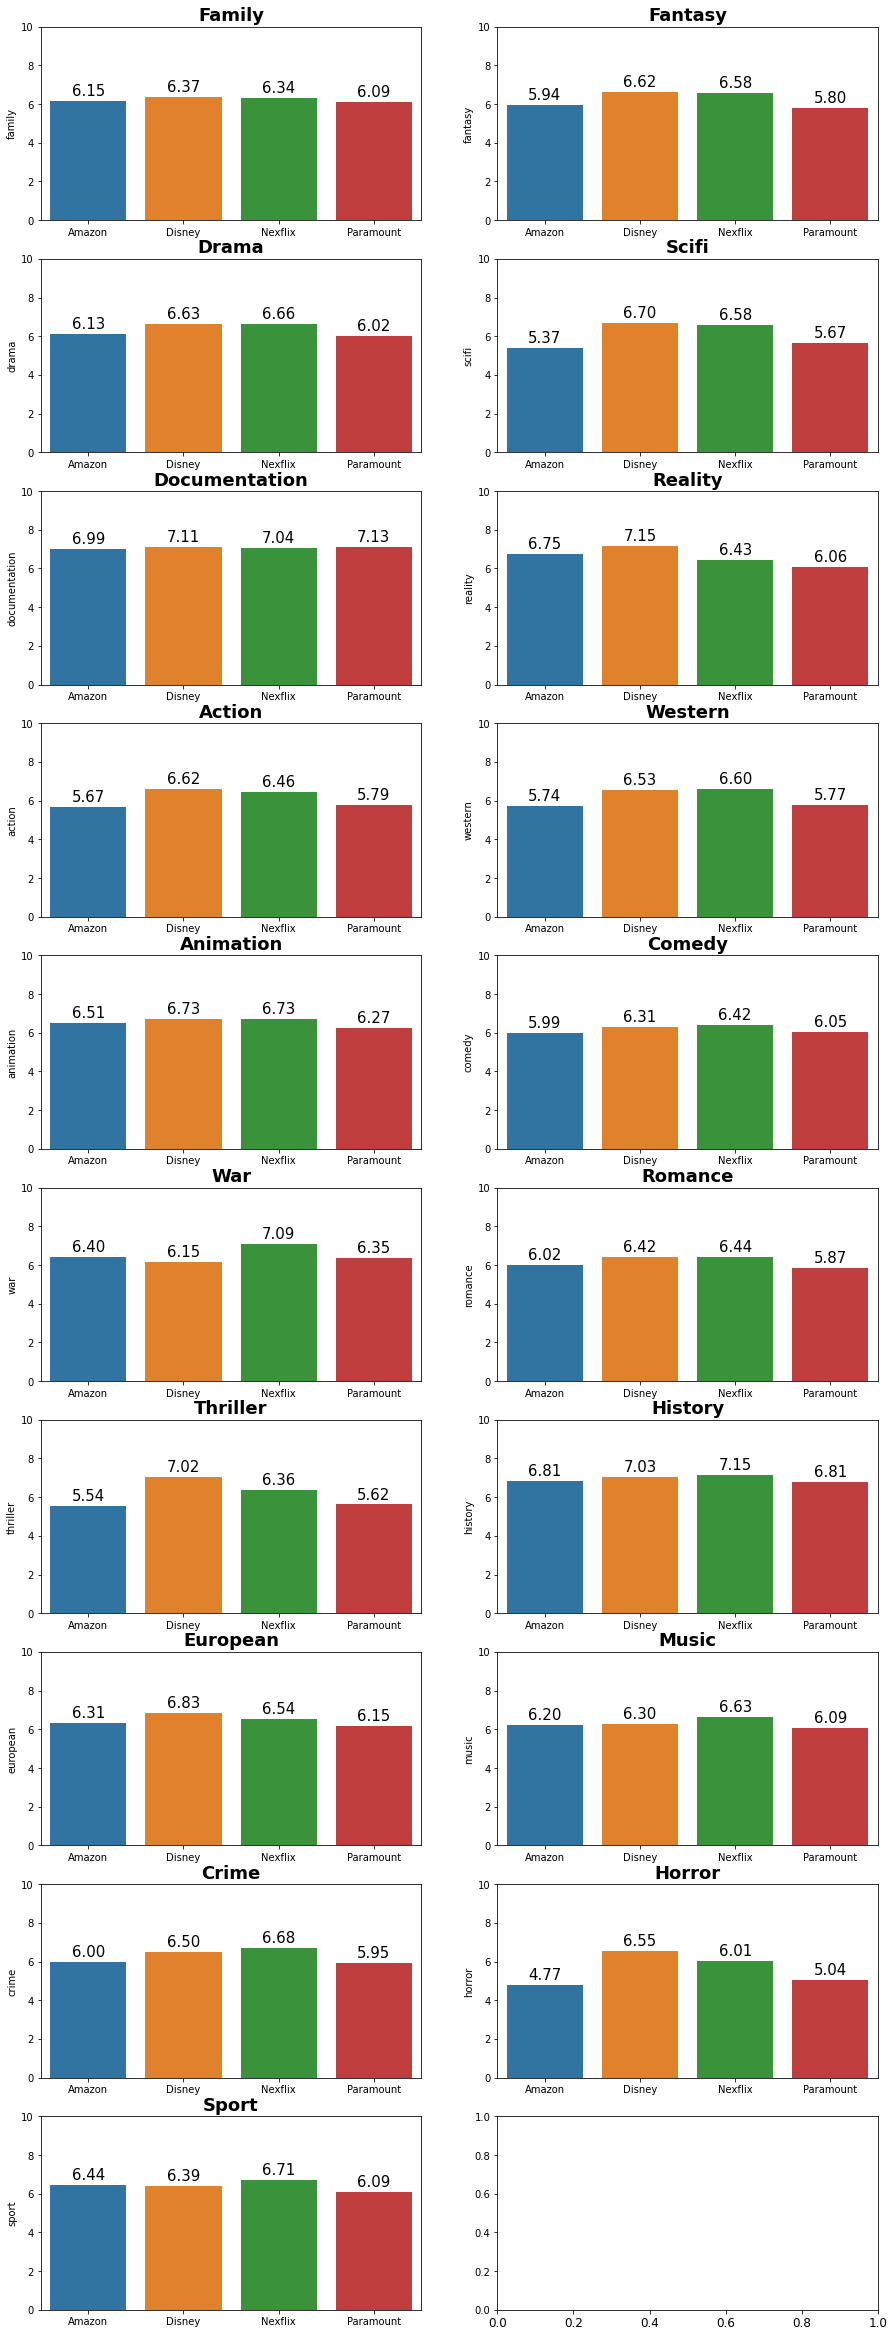

In [45]:
f , ax = plt.subplots(10,2,figsize = (15,42))

ax1 = sns.barplot(x = a['OTT'], y = a['family'] ,ax=ax[0,0])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.set_title('Family', fontdict = fontdict)
# ----------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = a['OTT'], y = a['fantasy'] ,ax=ax[0,1])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.set_title('Fantasy', fontdict = fontdict)
# ----------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = a['OTT'], y = a['drama'] ,ax=ax[1,0])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.set_title('Drama', fontdict = fontdict)
# ----------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = a['OTT'], y = a['scifi'] ,ax=ax[1,1])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.set_title('Scifi', fontdict = fontdict)
# ----------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = a['OTT'], y = a['documentation'] ,ax=ax[2,0])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.set_title('Documentation', fontdict = fontdict)
# ----------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = a['OTT'], y = a['reality'] ,ax=ax[2,1])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.set_title('Reality', fontdict = fontdict)
# ----------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = a['OTT'], y = a['action'] ,ax=ax[3,0])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.set_title('Action', fontdict = fontdict)
# ----------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = a['OTT'], y = a['western'] ,ax=ax[3,1])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.set_title('Western', fontdict = fontdict)
# ----------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = a['OTT'], y = a['animation'] ,ax=ax[4,0])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.set_title('Animation', fontdict = fontdict)
# ----------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = a['OTT'], y = a['comedy'] ,ax=ax[4,1])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.set_title('Comedy', fontdict = fontdict)
# ----------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = a['OTT'], y = a['war'] ,ax=ax[5,0])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.set_title('War', fontdict = fontdict)
# ----------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = a['OTT'], y = a['romance'] ,ax=ax[5,1])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.set_title('Romance', fontdict = fontdict)
# ----------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = a['OTT'], y = a['thriller'] ,ax=ax[6,0])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.set_title('Thriller', fontdict = fontdict)
# ----------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = a['OTT'], y = a['history'] ,ax=ax[6,1])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.set_title('History', fontdict = fontdict)
# ----------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = a['OTT'], y = a['european'] ,ax=ax[7,0])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.set_title('European', fontdict = fontdict)
# ----------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = a['OTT'], y = a['music'] ,ax=ax[7,1])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.set_title('Music', fontdict = fontdict)
# ----------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = a['OTT'], y = a['crime'] ,ax=ax[8,0])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.set_title('Crime', fontdict = fontdict)
# ----------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = a['OTT'], y = a['horror'] ,ax=ax[8,1])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.set_title('Horror', fontdict = fontdict)
# ----------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = a['OTT'], y = a['sport'] ,ax=ax[9,0])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.set_title('Sport', fontdict = fontdict)
plt.show()

- Imdb_score를 기준으로 한 장르별 평균 평점이다.  
- 4개의 회사 모두 다큐에서의 평점이 가장 높다. 
- amazon의 경우 전반적으로 장르별 평점이 낮으며, 특히 호러, 액션 ,서부, 공상과학 분야는 상대적으로 낮은 점수를 가지고 있다.
- 디즈니와 넷플릭스가 대부분의 장르에서 1,2위를 다투고 있으며, 근소한 차이로 디즈니의 평균 평점이 더 높다. 
- 파라마운트의 장르별 평균 평점을 보면 점수가 다소 높거나, 다소 낮은것을 볼 수 있다. 공상과학, 호러 등 장르에는 약점을 보이나, 다큐에서 가장 큰 평점을 가지고 있다.

  #### <이전 파이그래프를 참조한 인사이트>
- 디즈니의 경우 로맨스물에 대한 비중은 적으나 평균 평점이 높은 편에 속한다.
- 디즈니의 경우 스릴러물에 대한 분포(수량)은 적으나 평균 평점이 높음을 알 수 있다. 특히 리얼리티 장르에 대한 평점이 디즈니가 가장 좋다.
- 아마존의 경우 호러물이 타 회사보다 많은 비중을 차지하고 있지만 평점은 가장 낮은 점수를 가지고 있다.

-------
# 런타임별 평균 평점 및 인기도

In [46]:
ott_title['runtime'].value_counts()

90     779
95     415
100    381
93     349
92     343
      ... 
188      1
240      1
224      1
196      1
300      1
Name: runtime, Length: 221, dtype: int64

In [47]:
runtime = ott_title.copy()

In [48]:
# 런타임이 0이거나 1로 측정되어 있는 컬럼이 존재하며, 해당 컬럼은 이상치로 판단하고 런타임이 10분 이상인 데이터만 활용
runtime = runtime[runtime['runtime'] >= 10]

In [49]:
runtime['runtime'] = runtime['runtime'].replace(0,np.NaN)
runtime['imdb_score'] = runtime['imdb_score'].replace(0,np.NaN)
runtime.head()

,title_id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,horror,war,history,action,documentation,reality,music,fantasy,animation,drama
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,48,['documentation'],['US'],1.0,...,0,0,0,0,1,0,0,0,0,0
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,113,"['crime', 'drama']",['US'],1.0,...,0,0,0,0,0,0,0,0,0,1
2,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['comedy', 'fantasy']",['GB'],1.0,...,0,0,0,0,0,0,0,1,0,0
3,tm70993,Life of Brian,MOVIE,"Brian Cohen is an average young Jewish man, bu...",1979,R,94,['comedy'],['GB'],1.0,...,0,0,0,0,0,0,0,0,0,0
4,tm190788,The Exorcist,MOVIE,12-year-old Regan MacNeil begins to adapt an e...,1973,R,133,['horror'],['US'],1.0,...,1,0,0,0,0,0,0,0,0,0


In [50]:
# 확인
runtime[runtime['imdb_score'] == 0]

,title_id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,horror,war,history,action,documentation,reality,music,fantasy,animation,drama


In [51]:
amazon_df = runtime[runtime['OTT'] == 'Amazon']
disney_df = runtime[runtime['OTT'] == 'Disney']
nexflix_df = runtime[runtime['OTT'] == 'Nexflix']
paramount_df = runtime[runtime['OTT'] == 'Paramount']

In [52]:
amazon_df_small = amazon_df.nsmallest(n=250, columns = 'runtime', keep = 'all')
disney_df_small = disney_df.nsmallest(n=250, columns = 'runtime', keep = 'all')
nexflix_df_small = nexflix_df.nsmallest(n=250, columns = 'runtime', keep = 'all')
paramount_df_small = paramount_df.nsmallest(n=250, columns = 'runtime', keep = 'all')
# -----------------------------------------------------------------------------------------------------
amazon_df_large = amazon_df.nlargest(n=250, columns = 'runtime', keep = 'all')
disney_df_large = disney_df.nlargest(n=250, columns = 'runtime', keep = 'all')
nexflix_df_large = nexflix_df.nlargest(n=250, columns = 'runtime', keep = 'all')
paramount_df_large = paramount_df.nlargest(n=250, columns = 'runtime', keep = 'all')

In [53]:
print('아마존 런타임 하위 250의 평균 평점:','{0:.2f}'.format(amazon_df_small['imdb_score'].mean()))
print('디즈니 런타임 하위 250의 평균 평점:','{0:.2f}'.format(disney_df_small['imdb_score'].mean()))
print('넷플릭스 런타임 하위 250의 평균 평점:','{0:.2f}'.format(nexflix_df_small['imdb_score'].mean()))
print('파라마운트 런타임 하위 250의 평균 평점:','{0:.2f}'.format(paramount_df_small['imdb_score'].mean()))
print('='*50)
print('아마존 런타임 상위 250의 평균 평점:','{0:.2f}'.format(amazon_df_large['imdb_score'].mean()))
print('디즈니 런타임 상위 250의 평균 평점:','{0:.2f}'.format(disney_df_large['imdb_score'].mean()))
print('넷플릭스 런타임 상위 250의 평균 평점:','{0:.2f}'.format(nexflix_df_large['imdb_score'].mean()))
print('파라마운트 런타임 상위 250의 평균 평점:','{0:.2f}'.format(paramount_df_large['imdb_score'].mean()))

아마존 런타임 하위 250의 평균 평점: 6.75
디즈니 런타임 하위 250의 평균 평점: 6.58
넷플릭스 런타임 하위 250의 평균 평점: 6.64
파라마운트 런타임 하위 250의 평균 평점: 6.36
아마존 런타임 상위 250의 평균 평점: 6.51
디즈니 런타임 상위 250의 평균 평점: 6.77
넷플릭스 런타임 상위 250의 평균 평점: 6.64
파라마운트 런타임 상위 250의 평균 평점: 6.60


런타임 길이로 보면 각 회사별 평균이 거의 비슷하다  
런타임이 짧은 영상들 중 가장 평점이 높은 회사는 아마존이며  
런타임이 긴 영상들 중 가장 평점이 높은 회사는 디즈니이다.

In [54]:
print('아마존 런타임 하위 250의 총 인기도:','{0:.2f}'.format(amazon_df_small['tmdb_popularity'].sum()))
print('디즈니 런타임 하위 250의 총 인기도','{0:.2f}'.format(disney_df_small['tmdb_popularity'].sum()))
print('넷플릭스 런타임 하위 250의 총 인기도:','{0:.2f}'.format(nexflix_df_small['tmdb_popularity'].sum()))
print('파라마운트 런타임 하위 250의 총 인기도:','{0:.2f}'.format(paramount_df_small['tmdb_popularity'].sum()))
print('='*50)
print('아마존 런타임 상위 250의 총 인기도:','{0:.2f}'.format(amazon_df_large['tmdb_popularity'].sum()))
print('디즈니 런타임 상위 250의 총 인기도:','{0:.2f}'.format(disney_df_large['tmdb_popularity'].sum()))
print('넷플릭스 런타임 상위 250의 총 인기도:','{0:.2f}'.format(nexflix_df_large['tmdb_popularity'].sum()))
print('파라마운트 런타임 상위 250의 총 인기도:','{0:.2f}'.format(paramount_df_large['tmdb_popularity'].sum()))

아마존 런타임 하위 250의 총 인기도: 2029.43
디즈니 런타임 하위 250의 총 인기도 6571.20
넷플릭스 런타임 하위 250의 총 인기도: 4725.66
파라마운트 런타임 하위 250의 총 인기도: 4268.20
아마존 런타임 상위 250의 총 인기도: 1081.06
디즈니 런타임 상위 250의 총 인기도: 23543.50
넷플릭스 런타임 상위 250의 총 인기도: 2219.69
파라마운트 런타임 상위 250의 총 인기도: 6621.38


런타임 길이별 인기도를 측정한 결과로  
런타임이 짧은 영상들 중 가장 인기있는 회사는 디즈니이며  
런타임이 긴 영상들 중 가장 인기있는 회사도 디즈니이다.  

즉, 디즈니 영상들에 대한 전반적인 인기가 높다는 것을 확인할 수 있다.

-----
# 회사별 런타임 길이

In [55]:
ott_title['runtime'].isnull().sum()

0

In [56]:
df = runtime.groupby('OTT')['runtime'].mean()
df = df.reset_index()
df

,OTT,runtime
0,Amazon,86.633745
1,Disney,69.838066
2,Nexflix,78.696191
3,Paramount,72.495204


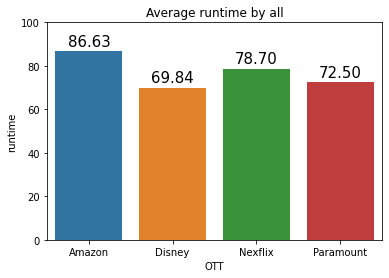

In [57]:
ax = sns.barplot(x = df['OTT'], y = df['runtime'])
for p in ax.patches: 
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
ax.set_ylim(0,100) 
ax.set_title('Average runtime by all')
plt.show()

평균 런타임 시간은 disney가 약 70분으로 가장 짧은것으로 확인이 된다.   

In [58]:
runtime['OTT'].value_counts()

Amazon       9791
Nexflix      5724
Paramount    2815
Disney       1303
Name: OTT, dtype: int64

In [59]:
# 각 회사의 타입(영화 or 쇼)의 런타임 평균
a = runtime.groupby(['OTT','type'])['runtime'].mean()
a = a.reset_index()
a

,OTT,type,runtime
0,Amazon,MOVIE,94.063610
1,Amazon,SHOW,37.496112
2,Disney,MOVIE,84.336864
3,Disney,SHOW,31.713092
4,Nexflix,MOVIE,98.980539
5,Nexflix,SHOW,40.132286
6,Paramount,MOVIE,83.200728
7,Paramount,SHOW,34.436893


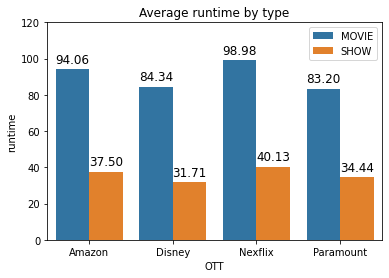

In [60]:
ax = sns.barplot(x = a['OTT'], y = a['runtime'], hue = a['type'])
for p in ax.patches: 
    ax.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=12, color='black', xytext=(0, 10), 
       textcoords='offset points') 
ax.set_ylim(0,120) 
ax.set_title('Average runtime by type')
ax.legend(title='')
plt.show()

------
# 회사별 장르에 따른 런타임 평균평점 및 인기도

In [61]:
ratings_runtime = {
    range(0,20): '20min',
    range(20,60): '20~1hour',
    range(60,120): '1~2hours',
    range(120,180): '2~3hours',
    range(180,240): '3~4hours',
    range(240,300): '4~5hours',
    range(300,600): 'over 5hours',
}

runtime['ratings_runtime'] = runtime['runtime'].replace(ratings_runtime)
runtime['ratings_runtime'].unique()

array(['20~1hour', '1~2hours', '2~3hours', '3~4hours', '4~5hours',
       '20min', 'over 5hours'], dtype=object)

In [62]:
df = runtime.groupby(['OTT','ratings_runtime'])[('imdb_score')].mean()
df = df.reset_index()
df

,OTT,ratings_runtime,imdb_score
0,Amazon,1~2hours,5.691676
1,Amazon,20min,6.856731
2,Amazon,20~1hour,6.802119
3,Amazon,2~3hours,6.305882
4,Amazon,3~4hours,6.829412
5,Amazon,4~5hours,6.625000
6,Amazon,over 5hours,4.700000
7,Disney,1~2hours,6.325225
8,Disney,20min,6.724000
9,Disney,20~1hour,6.829082


In [63]:
amazon_runtime = df[df['OTT'] == 'Amazon']
disney_runtime = df[df['OTT'] == 'Disney']
nexflix_runtime = df[df['OTT'] == 'Nexflix']
paramount_runtime = df[df['OTT'] == 'Paramount']

Text(0.5, 1.0, 'paramount avergae score by runtime')

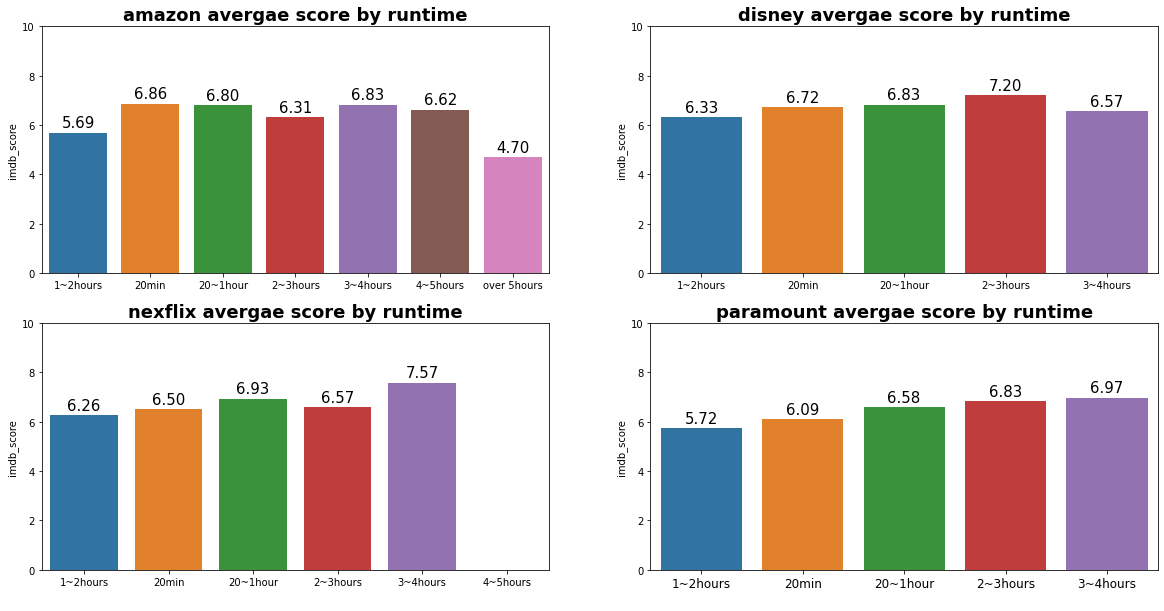

In [64]:
f , ax = plt.subplots(2,2,figsize = (20,10))

ax1 = sns.barplot(x = amazon_runtime['ratings_runtime'], y = amazon_runtime['imdb_score'] ,ax=ax[0,0])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.set_title('amazon avergae score by runtime', fontdict = fontdict)
# -------------------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = disney_runtime['ratings_runtime'], y = disney_runtime['imdb_score'] ,ax=ax[0,1])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.set_title('disney avergae score by runtime', fontdict = fontdict)
# -------------------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = nexflix_runtime['ratings_runtime'], y = nexflix_runtime['imdb_score'] ,ax=ax[1,0])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.set_title('nexflix avergae score by runtime', fontdict = fontdict)
# -------------------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = paramount_runtime['ratings_runtime'], y = paramount_runtime['imdb_score'] ,ax=ax[1,1])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.set_title('paramount avergae score by runtime', fontdict = fontdict)

- 아마존은 1시간까지의 런타임의 평균이 높으나, 의외로 1,2시간 짜리 런타임의 평균이 낮은것을 알 수 있다. 보통 1,2시간 짜리는 영화가 많을 것이며, 아마존 영화에 대한 평점이 좋지 못하다고 유추할 수 있을 것이다. 
- 디즈니의 경우 전반적으로 평점이 높으며 2~3시간 짜리에 대한 평점이 가장 높다. 해당 데이터를 살펴본 결과 마블에 영화에 대한 데이터가 많이 존재했으며, 이 데이터가 좋은 평점을 산출하는데 일조했다고 유추 할 수 있다.
- 넷플릭스의 경우 3,4시간의 런타임에 대한 평점이 높다. 해당 값을 살펴본 결과 2010년 이전의 영화 더불어 1990년대의 영화가 많이 분포해 있다. 넷플릭스의 영화 중 고전영화에 대한 평점이 높음을 유추해 볼 수 있다.
- 파라마운트의 경우 런타임 시간이 길어질 수록 평균 평점이 높아지는 모습을 보이고 있다. 파라마운트 역시 넷플릭스와 동일하게 고전영화에 대한 평점이 높다.

In [65]:
# 위 시각화그래프에 대한 데이터 확인용 셀
runtime[(runtime['ratings_runtime']=='over 5hours') & (runtime['OTT'] == 'Amazon')]

,title_id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,...,war,history,action,documentation,reality,music,fantasy,animation,drama,ratings_runtime
11069,tm111211,Custer's Last Stand,MOVIE,Kit Cardigan seeks the killer of his father......,1936,uknown,328,"['western', 'history', 'romance', 'war']",['US'],1.0,...,1,1,0,0,0,0,0,0,0,over 5hours
13302,tm244078,Millennium,MOVIE,Mini series incorporating The Girl With the Dr...,2010,uknown,540,"['thriller', 'crime']",['SE'],1.0,...,0,0,0,0,0,0,0,0,0,over 5hours
15392,tm562713,9 Hours,MOVIE,A fashion film. A couple spend 9 hours togethe...,2014,uknown,549,['european'],['DK'],1.0,...,0,0,0,0,0,0,0,0,0,over 5hours
19986,tm1176334,Chhote Ustaad-Precaution Is Better Than Cure,MOVIE,"Chhote Ustad-precaution is better than cure, s...",2021,uknown,300,['crime'],[],1.0,...,0,0,0,0,0,0,0,0,0,over 5hours


In [66]:
df = runtime.groupby(['OTT','ratings_runtime','type'])[('imdb_score')].mean()
df = df.reset_index()
df

,OTT,ratings_runtime,type,imdb_score
0,Amazon,1~2hours,MOVIE,5.674089
1,Amazon,1~2hours,SHOW,7.377778
2,Amazon,20min,MOVIE,6.240000
3,Amazon,20min,SHOW,6.887879
4,Amazon,20~1hour,MOVIE,6.175882
5,Amazon,20~1hour,SHOW,7.137251
6,Amazon,2~3hours,MOVIE,6.304600
7,Amazon,2~3hours,SHOW,7.700000
8,Amazon,3~4hours,MOVIE,6.829412
9,Amazon,4~5hours,MOVIE,6.625000


In [67]:
amazon_runtime = df[df['OTT'] == 'Amazon']
disney_runtime = df[df['OTT'] == 'Disney']
nexflix_runtime = df[df['OTT'] == 'Nexflix']
paramount_runtime = df[df['OTT'] == 'Paramount']

Text(0.5, 1.0, 'paramount avergae score by runtime')

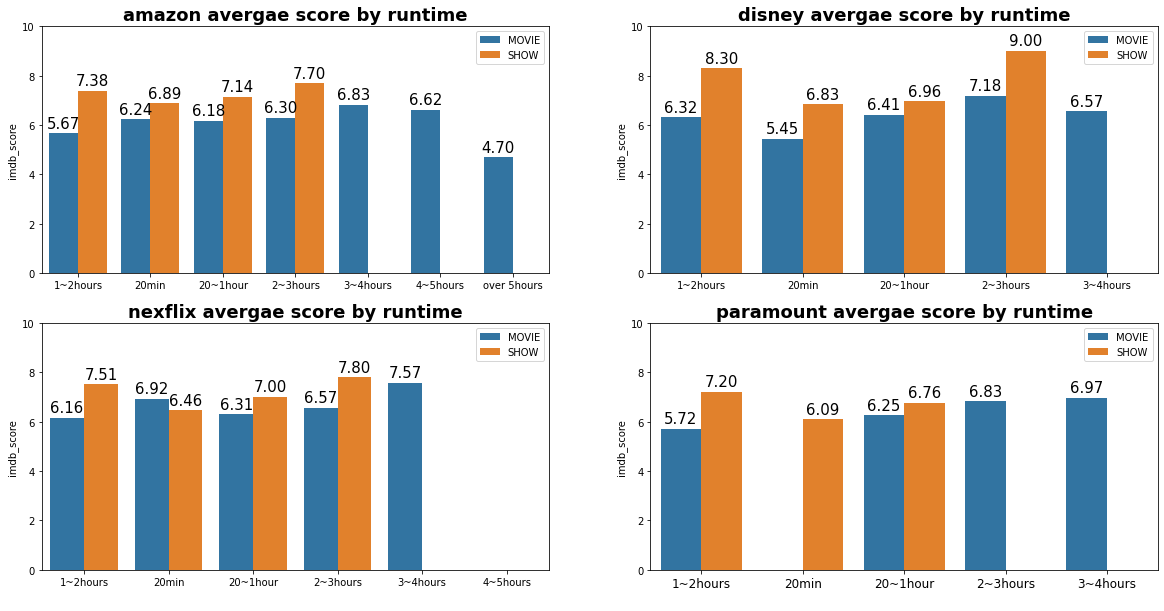

In [68]:
f , ax = plt.subplots(2,2,figsize = (20,10))

ax1 = sns.barplot(x = amazon_runtime['ratings_runtime'], y = amazon_runtime['imdb_score'], hue= amazon_runtime['type'] ,ax=ax[0,0])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.legend(title='',loc = 'upper right')
ax1.set_title('amazon avergae score by runtime', fontdict = fontdict)
# -------------------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = disney_runtime['ratings_runtime'], y = disney_runtime['imdb_score'],hue= disney_runtime['type'] ,ax=ax[0,1])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.legend(title='',loc = 'upper right')
ax1.set_title('disney avergae score by runtime', fontdict = fontdict)
# -------------------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = nexflix_runtime['ratings_runtime'], y = nexflix_runtime['imdb_score'],hue= nexflix_runtime['type'] ,ax=ax[1,0])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.legend(title='',loc = 'upper right')
ax1.set_title('nexflix avergae score by runtime', fontdict = fontdict)
# -------------------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = paramount_runtime['ratings_runtime'], y = paramount_runtime['imdb_score'],hue= paramount_runtime['type'] ,ax=ax[1,1])
for p in ax1.patches: 
    ax1.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,10)
ax1.set_xlabel(' ')
ax1.legend(title='',loc = 'upper right')
ax1.set_title('paramount avergae score by runtime', fontdict = fontdict)

- 4개의 회사 전반적으로 show에 대한 평균 평점이 높았으나, 넷플릭스의 경우 20분 미만의 영화가 쇼보다 평균 평점이 높다.

- 4개 회사 전반적으로 3시간을 넘어서는 쇼 장르는 없으며, 파라마운트의 경우 1시간이 넘어가는 show 장르의 데이터가 없다.


# 런타임별 tmdb 인기도

Text(0.5, 1.0, 'paramount popularity by runtime')

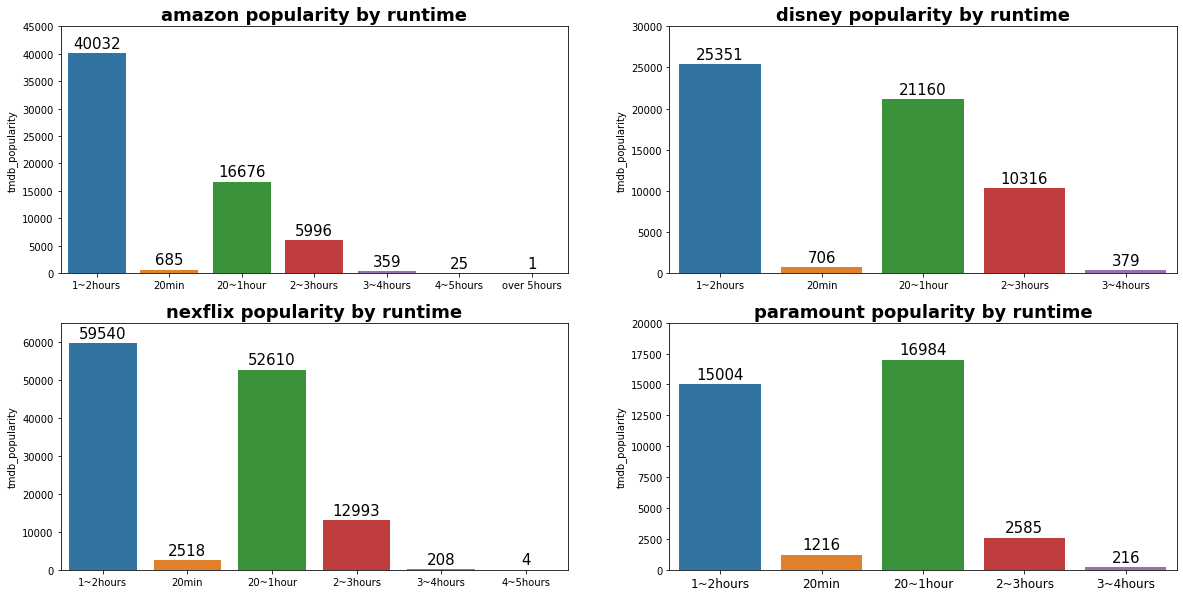

In [69]:
df = runtime.groupby(['OTT','ratings_runtime'])[('tmdb_popularity')].sum()
df = df.reset_index()
# ----------------------------------------------------------------------------------------
amazon_runtime = df[df['OTT'] == 'Amazon']
disney_runtime = df[df['OTT'] == 'Disney']
nexflix_runtime = df[df['OTT'] == 'Nexflix']
paramount_runtime = df[df['OTT'] == 'Paramount']
# ----------------------------------------------------------------------------------------
f , ax = plt.subplots(2,2,figsize = (20,10))

ax1 = sns.barplot(x = amazon_runtime['ratings_runtime'], y = amazon_runtime['tmdb_popularity'] ,ax=ax[0,0])
for p in ax1.patches: 
    ax1.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,45000)
ax1.set_xlabel(' ')
ax1.set_title('amazon popularity by runtime', fontdict = fontdict)
# -------------------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = disney_runtime['ratings_runtime'], y = disney_runtime['tmdb_popularity'] ,ax=ax[0,1])
for p in ax1.patches: 
    ax1.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,30000)
ax1.set_xlabel(' ')
ax1.set_title('disney popularity by runtime', fontdict = fontdict)
# -------------------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = nexflix_runtime['ratings_runtime'], y = nexflix_runtime['tmdb_popularity'] ,ax=ax[1,0])
for p in ax1.patches: 
    ax1.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,65000)
ax1.set_xlabel(' ')
ax1.set_title('nexflix popularity by runtime', fontdict = fontdict)
# -------------------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = paramount_runtime['ratings_runtime'], y = paramount_runtime['tmdb_popularity'] ,ax=ax[1,1])
for p in ax1.patches: 
    ax1.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,20000)
ax1.set_xlabel(' ')
ax1.set_title('paramount popularity by runtime', fontdict = fontdict)

- 전반적으로 2시간 이하의 영상들에 대한 선호도가 있음을 알 수 있다. 
- 파라마운트의 경우 20분에서 1시간 짜리 영상이 오히러 1에서 2시간 짜리 영상보다 더 인기가 많다.

Text(0.5, 1.0, 'paramount popularity by runtime')

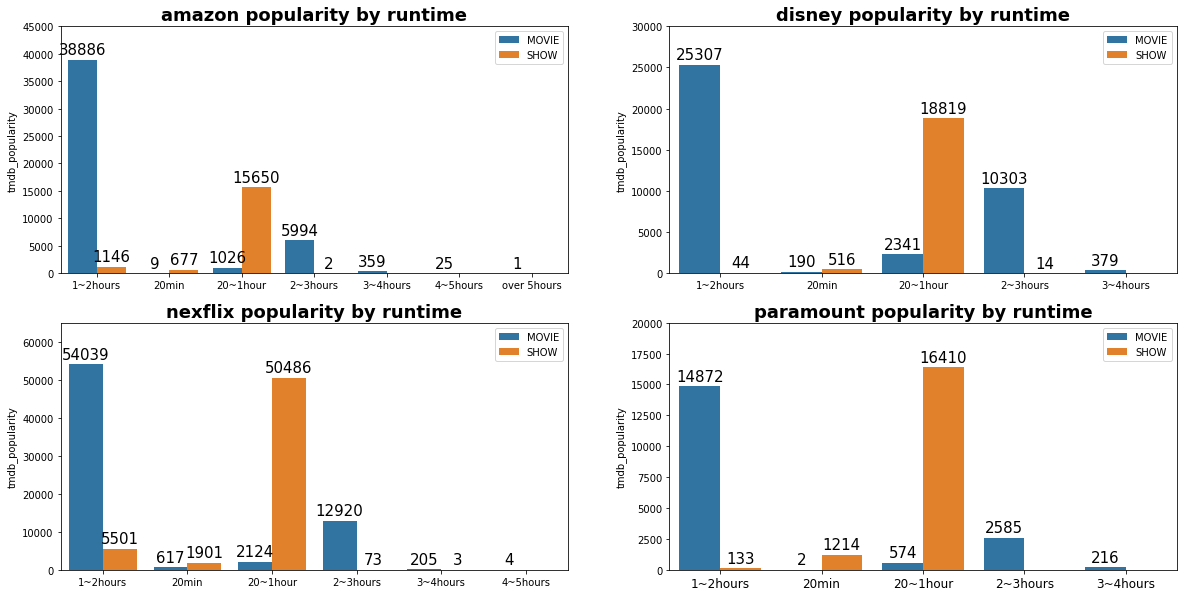

In [70]:
df = runtime.groupby(['OTT','ratings_runtime','type'])[('tmdb_popularity')].sum()
df = df.reset_index()
# ------------------------------------------------------------------------------------------
amazon_runtime = df[df['OTT'] == 'Amazon']
disney_runtime = df[df['OTT'] == 'Disney']
nexflix_runtime = df[df['OTT'] == 'Nexflix']
paramount_runtime = df[df['OTT'] == 'Paramount']
# ------------------------------------------------------------------------------------------
f , ax = plt.subplots(2,2,figsize = (20,10))

ax1 = sns.barplot(x = amazon_runtime['ratings_runtime'], y = amazon_runtime['tmdb_popularity'], hue= amazon_runtime['type'] ,ax=ax[0,0])
for p in ax1.patches: 
    ax1.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,45000)
ax1.set_xlabel(' ')
ax1.legend(title='',loc = 'upper right')
ax1.set_title('amazon popularity by runtime', fontdict = fontdict)
# -------------------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = disney_runtime['ratings_runtime'], y = disney_runtime['tmdb_popularity'],hue= disney_runtime['type'] ,ax=ax[0,1])
for p in ax1.patches: 
    ax1.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,30000)
ax1.set_xlabel(' ')
ax1.legend(title='',loc = 'upper right')
ax1.set_title('disney popularity by runtime', fontdict = fontdict)
# -------------------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = nexflix_runtime['ratings_runtime'], y = nexflix_runtime['tmdb_popularity'],hue= nexflix_runtime['type'] ,ax=ax[1,0])
for p in ax1.patches: 
    ax1.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,65000)
ax1.set_xlabel(' ')
ax1.legend(title='',loc = 'upper right')
ax1.set_title('nexflix popularity by runtime', fontdict = fontdict)
# -------------------------------------------------------------------------------------------------------------------------
ax1 = sns.barplot(x = paramount_runtime['ratings_runtime'], y = paramount_runtime['tmdb_popularity'],hue= paramount_runtime['type'] ,ax=ax[1,1])
for p in ax1.patches: 
    ax1.annotate("%.f" % p.get_height(), (p.get_x() + p.get_width()/2., p.get_height()), 
       ha='center', va='center', fontsize=15, color='black', xytext=(0, 10), 
       textcoords='offset points') 
fontdict = {'fontsize': 18,'fontweight': 'bold'}
plt.xticks(fontsize=12)
ax1.set_ylim(0,20000)
ax1.set_xlabel(' ')
ax1.legend(title='',loc = 'upper right')
ax1.set_title('paramount popularity by runtime', fontdict = fontdict)

- 전반적으로 1시간에서 2시간짜리 movie에 대한 선호도와 20분에서 1시간 짜리 show에 대한 선호도가 두드러지게 나타남을 알 수 있다.
- 디즈니의 경우 2에서 3시간짜리 movie에 대한 인기가 많으며 해당 데이터는 마블 영화에 대한 데이터로 인해 높은 인기도를 가지는 것으로 보인다.

In [71]:
# 데이터 확인용 셀 
#runtime[(runtime['ratings_runtime']=='1~2hours') & (runtime['type'] == 'MOVIE') & (runtime['OTT'] == 'Amazon')]